In [20]:
import opendatasets as od
import pandas 

od.download("https://www.kaggle.com/datasets/sukhmandeepsinghbrar/most-subscribed-youtube-channel")


Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: anushkaaarawat
Your Kaggle Key: ········


100%|█████████████████████████████████████████████████████████████████████████████| 1.30k/1.30k [00:00<00:00, 1.33MB/s]

In [22]:
import pandas as pd
df=pd.read_csv('Most Subscribed YouTube Channels_exported.csv')
df.head()

,Name,Brand channel,Subscribers (millions),Primary language,Category,Country
0,T-Series,Yes,249.0,Hindi[7][8],Music,India
1,MrBeast,No,184.0,English,Entertainment,United States
2,Cocomelon,Yes,165.0,English,Education,United States
3,Sony Entertainment Television India,Yes,162.0,Hindi[9],Entertainment,India
4,Kids Diana Show,Yes,113.0,English[10][11][12],Entertainment,Ukraine- United States


In [23]:
df.columns

Index(['Name', 'Brand channel', 'Subscribers (millions)', 'Primary language',
       'Category', 'Country'],
      dtype='object')

In [24]:
df.shape

(50, 6)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Name                    50 non-null     object 
 1   Brand channel           50 non-null     object 
 2   Subscribers (millions)  50 non-null     float64
 3   Primary language        50 non-null     object 
 4   Category                50 non-null     object 
 5   Country                 50 non-null     object 
dtypes: float64(1), object(5)
memory usage: 2.5+ KB


In [26]:
df.dtypes

Name                       object
Brand channel              object
Subscribers (millions)    float64
Primary language           object
Category                   object
Country                    object
dtype: object

In [27]:
df.isnull().sum()

Name                      0
Brand channel             0
Subscribers (millions)    0
Primary language          0
Category                  0
Country                   0
dtype: int64

In [28]:
for column in df.select_dtypes(include='object').columns:
    print(column)
    print(df[column].value_counts())
    print()

Name
T-Series                                 1
Ed Sheeran                               1
El Reino Infantil                        1
Aaj Tak                                  1
Wave Music                               1
Sony Music India                         1
Eminem                                   1
Marshmello                               1
Yash Raj Films                           1
Infobells                                1
LooLoo Kids                              1
Taylor Swift                             1
BillionSurpriseToys                      1
MrBeast                                  1
Ariana Grande                            1
Shemaroo                                 1
JuegaGerman                              1
Billie Eilish                            1
Get Movies                               1
SonyMusicIndiaVEVO                       1
A4                                       1
Badabun                                  1
Bad Bunny                                1
Har Pa

In [34]:
df['Primary language'] = df['Primary language'].replace(['Hindi[7][8]', 'Hindi[9]', 'Hindi[13][14]', 'Hindi[16]'], 'Hindi')

df['Primary language'] = df['Primary language'].replace(['English[10][11][12]'], 'English')

print(df['Primary language'].value_counts())


English       20
Hindi         17
Spanish        5
Korean         3
Russian        2
Portuguese     1
Bhojpuri       1
Urdu           1
Name: Primary language, dtype: int64


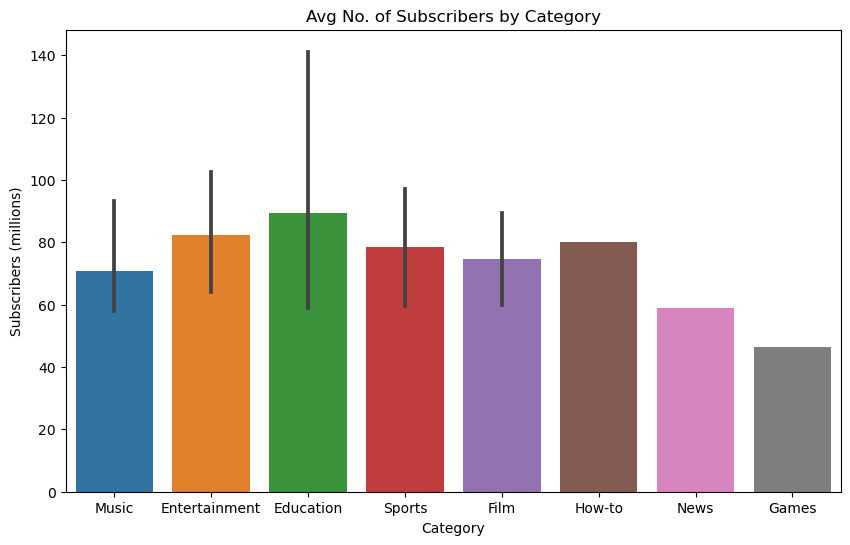

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x='Category', y='Subscribers (millions)', data=df)
plt.title('Avg No. of Subscribers by Category')
plt.xlabel('Category')
plt.ylabel('Subscribers (millions)')
plt.show()

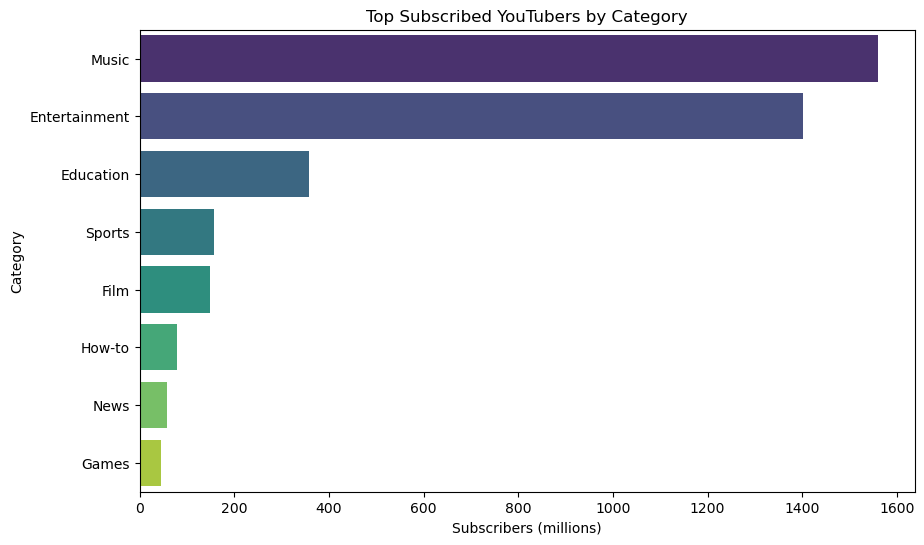

In [36]:
subscribers_by_category = df.groupby('Category')['Subscribers (millions)'].sum().reset_index()

subscribers_by_category = subscribers_by_category.sort_values(by='Subscribers (millions)', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Subscribers (millions)', y='Category', data=subscribers_by_category, palette='viridis')
plt.title('Top Subscribed YouTubers by Category')
plt.xlabel('Subscribers (millions)')
plt.ylabel('Category')
plt.show()

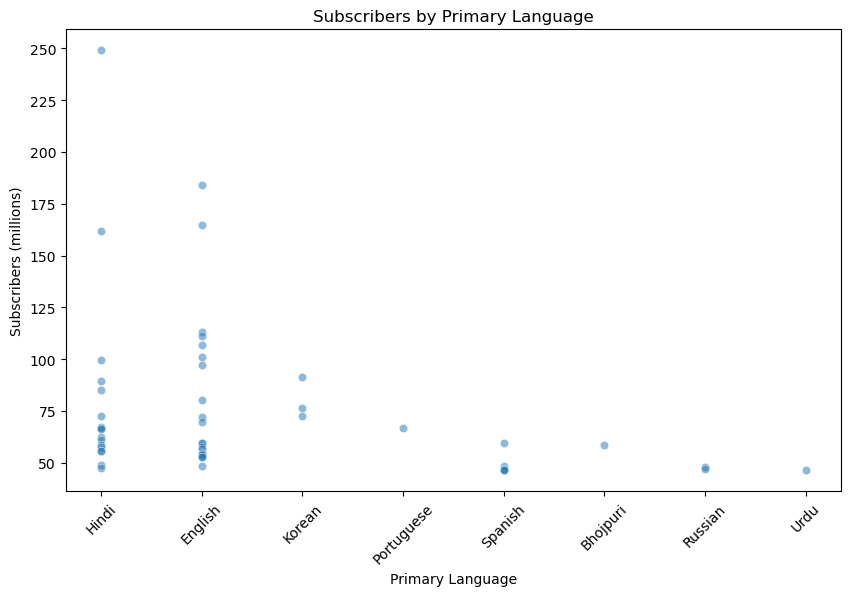

In [37]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Primary language', y='Subscribers (millions)', data=df, alpha=0.5)
plt.title('Subscribers by Primary Language')
plt.xlabel('Primary Language')
plt.ylabel('Subscribers (millions)')
plt.xticks(rotation=45)
plt.show()


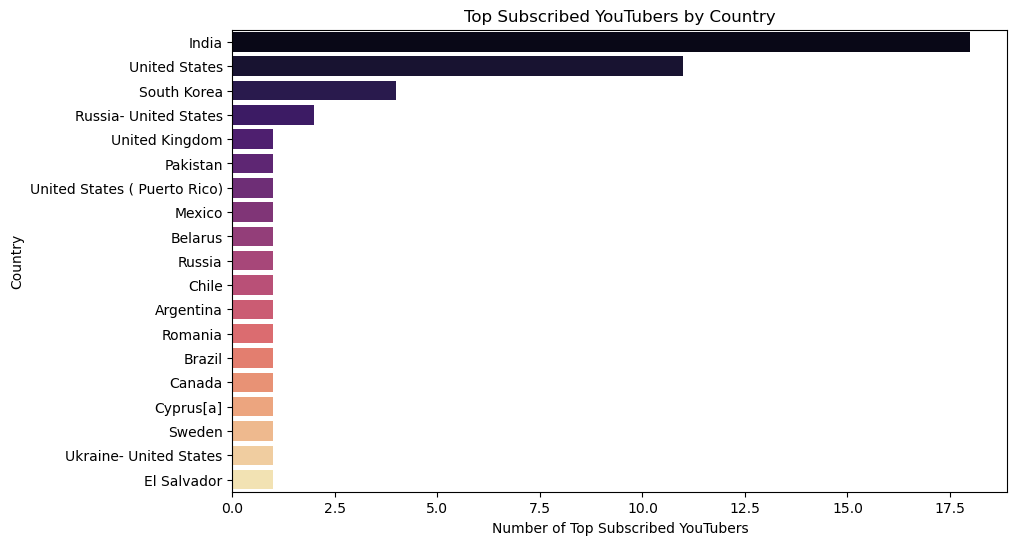

In [38]:
top_subscribed_by_country = df['Country'].value_counts().reset_index()
top_subscribed_by_country.columns = ['Country', 'Number of Top Subscribed YouTubers']

plt.figure(figsize=(10, 6))
sns.barplot(x='Number of Top Subscribed YouTubers', y='Country', data=top_subscribed_by_country, palette='magma')
plt.title('Top Subscribed YouTubers by Country')
plt.xlabel('Number of Top Subscribed YouTubers')
plt.ylabel('Country')
plt.show()


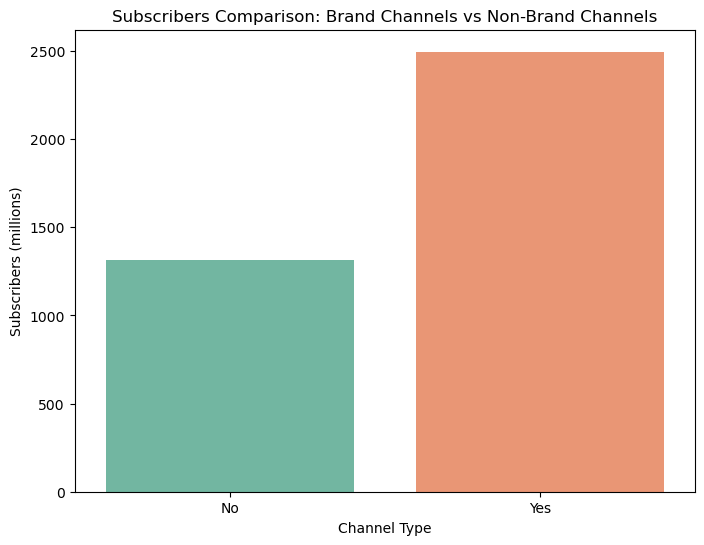

In [41]:
subscribers_by_channel_type = df.groupby('Brand channel')['Subscribers (millions)'].sum().reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(x='Brand channel', y='Subscribers (millions)', data=subscribers_by_channel_type, palette='Set2')
plt.title('Subscribers Comparison: Brand Channels vs Non-Brand Channels')
plt.xlabel('Channel Type')
plt.ylabel('Subscribers (millions)')
plt.show()


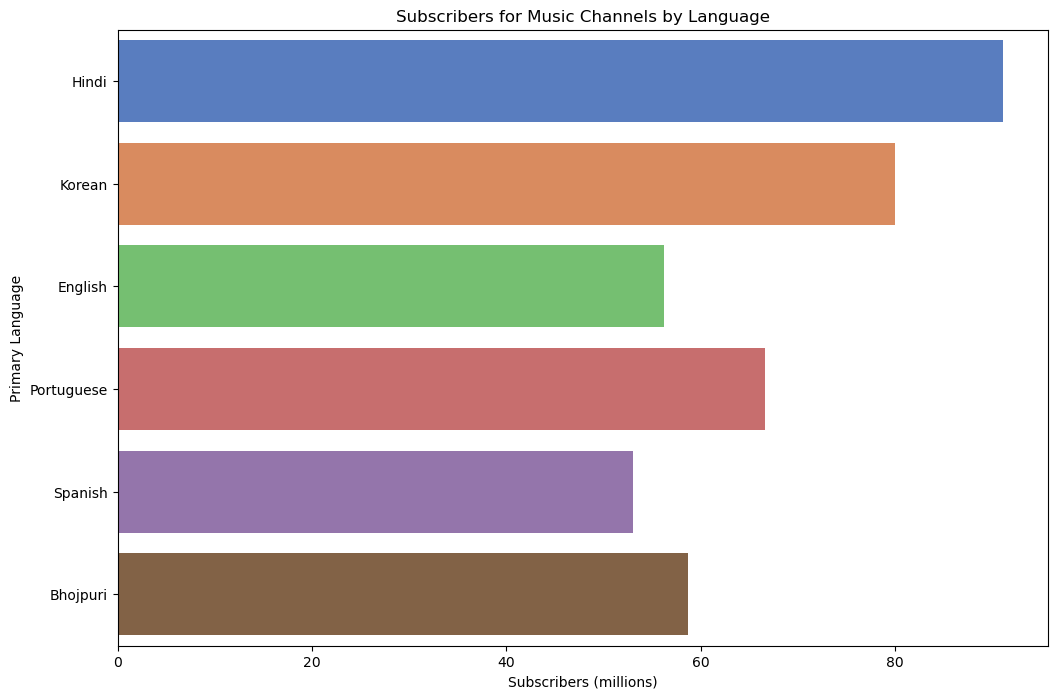

In [44]:
music_channels = df[df['Category'] == 'Music']

plt.figure(figsize=(12, 8))
sns.barplot(x='Subscribers (millions)', y='Primary language', data=music_channels, palette='muted', errorbar=None)
plt.title('Subscribers for Music Channels by Language')
plt.xlabel('Subscribers (millions)')
plt.ylabel('Primary Language')
plt.show()
